This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas
To see a breakdown of the data titles: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html

In [1112]:
# import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1113]:
# read data from file 'UsArrests.csv'
df = pd.read_csv("UsArrests.csv",index_col='City') # Reading data, making 'City' index(as it is the only column with str)
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.20,236,58,21.20
Alaska,10.00,263,48,44.50
Arizona,8.10,294,80,31.00
Arkansas,8.80,190,50,19.50
California,9.00,276,91,40.60


In [1114]:
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 4


In [1115]:
#To set the decimal precision at 2 points in float format
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [1116]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing
# No values are missing, no action is required

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [1117]:
# It is often useful to determine the type of each variable.
df.info() # Examines types

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:
* Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

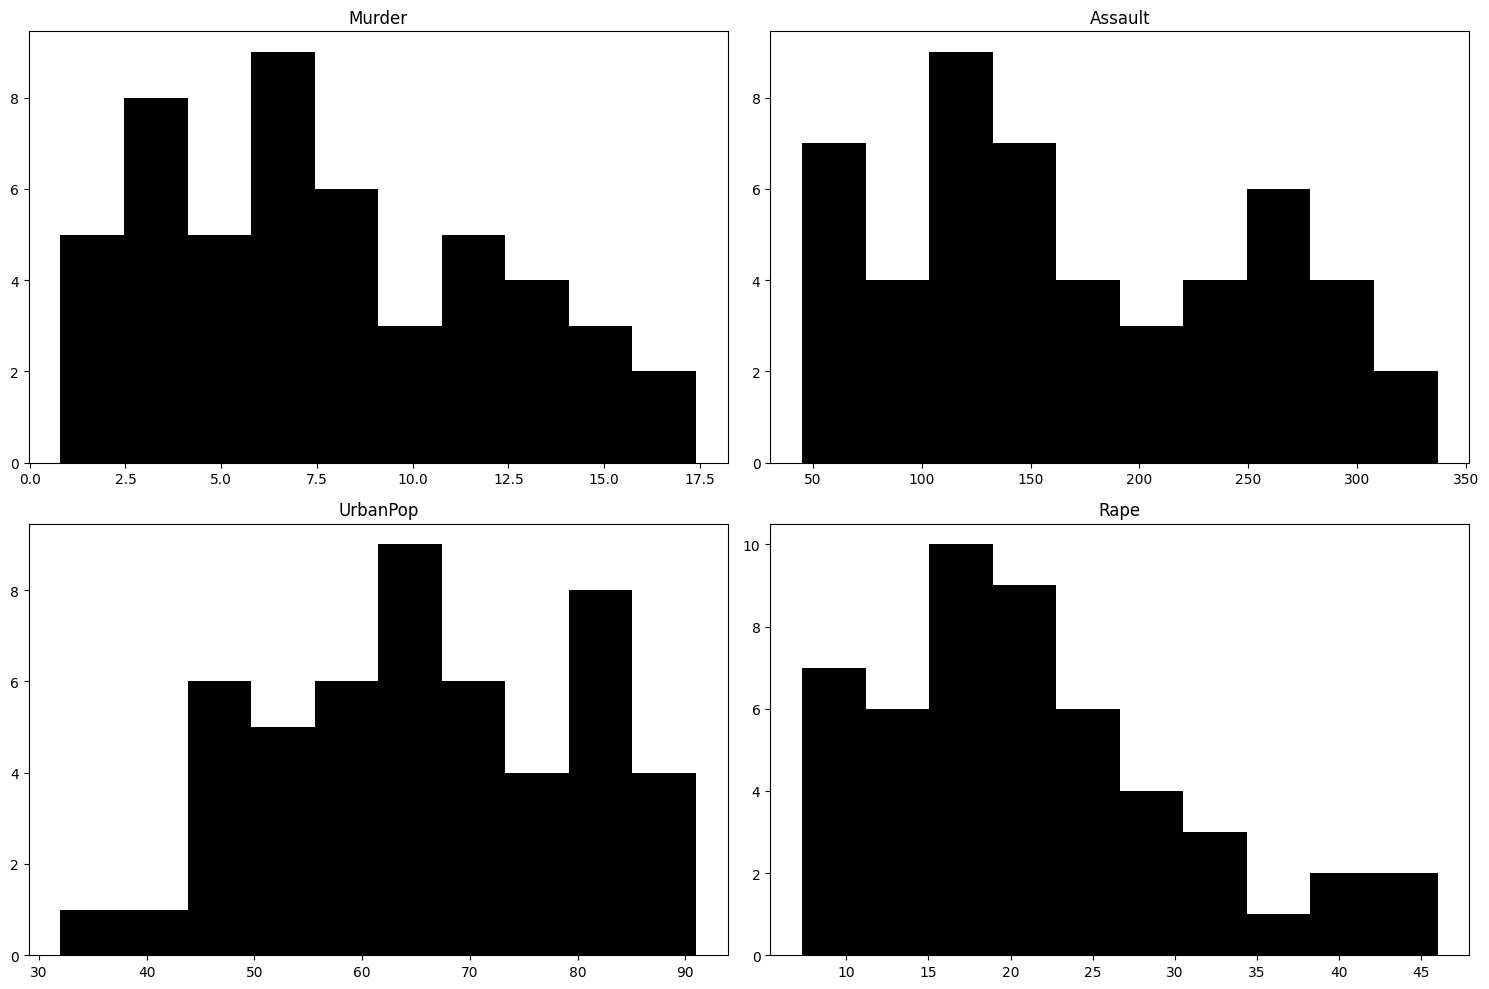

In [1118]:
# Histograms will give a general idea on the distribution of crimes/arrests committed throughout the USA
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

In [1119]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


The mean for Assault is much higher than any other category, meaning Assault is much more common than Rape and Murder.
Murder has the lowest statistics, meaning it is the least common.
UrbanPop is a percentage of the urban population which is hoswn to range from 32% to 91%.

## Correlation Analysis

In [1120]:
cities = df.index
corr_df = df.corr()
labels =corr_df.columns

correlations = corr_df.corr()

<AxesSubplot: >

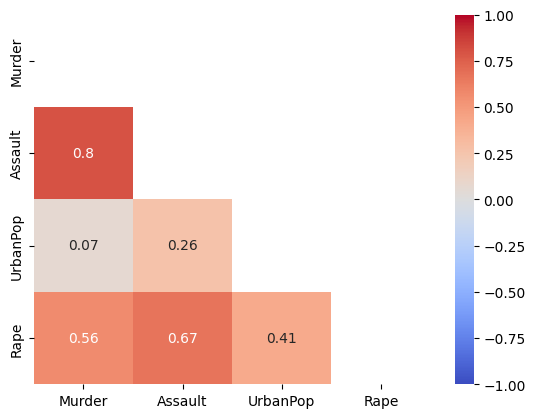

In [1121]:
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool_)
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True,fmt='.2g', mask=mask_ut, cmap="coolwarm")

In the plot, there is a linear correlation between strongly correlated variables: those coloured in either dark red or dark blue. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively correlated variables are blue: a decrease in one means an increase in the other.

At a glance one can see that all the variables, except one pair (UrbanPop and Murder), have a positive correlation. This suggests that if there is a high rate of one kind of crime in an area the likelihood of other kinds of crime rates being high is expected.
Murder and UrbanPop have the weakest correlation (0.07).
Assault and Murder have the strongest positive correlation (0.8).
The most moderate correlation is between Rape and UrbanPop (0.41).
Assault and UrbanPop have a weak positive correlation (0.26).
Rape and Murder have a moderately strong positive correlation (0.56).
Assault and Rape have a strong positive correlation (0.67).


Overall this shows that this data is a poor candidate for a PCA as there are not many variables that have strong negative and
positive correlations with each other.

## PCA
Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 

In [1122]:
np.set_printoptions(precision=2)

# select features without standardising
X = df.values

# create PCA object
pca = PCA()

# obtain components
X_trans = pca.fit_transform(X)

# transform the components into a pandas data frame
df_pca = pd.DataFrame(X_trans, index=df.index)
# This is to include the city name as the rownames in the PC's
df_pca.head()

,0,1,2,3
City,,,,
Alabama,64.80,11.45,-2.49,2.41
Alaska,92.83,17.98,20.13,-4.09
Arizona,124.07,-8.83,-1.69,-4.35
Arkansas,18.34,16.70,0.21,-0.52
California,107.42,-22.52,6.75,-2.81


In [1123]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [1124]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [1125]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [1126]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

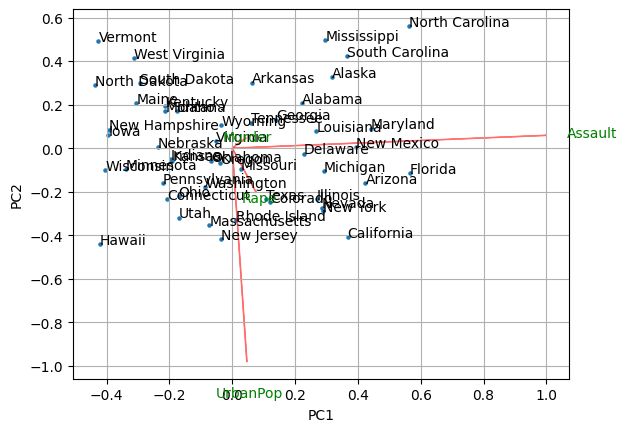

In [1127]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that Assault and UrbanPop are the most important features as the arrows to each of these dominate the biplot.

This information can also be quantified as follows:

In [1128]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, most with low importance.
The most important for PC1 is Assault and for PC2 is UrbanPop, each of which dominate their PC with over 0.9 importance.

## Standardised Data

We standardise the data so that some features do not swamp the others.

In [1129]:
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


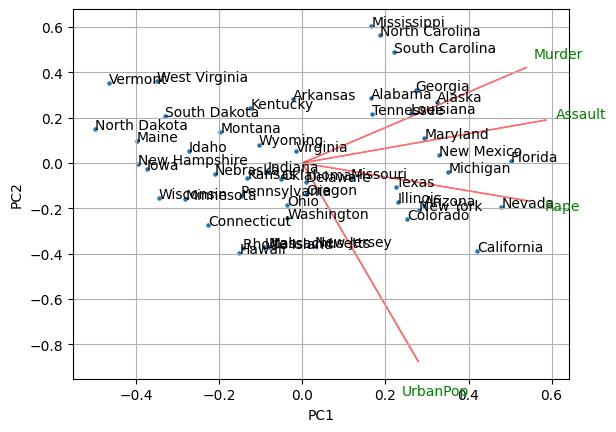

In [1130]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. We also see that the the different features cluster together in groups.
It can be seen that Murder and Assault have the strongest positive correlations for PC1.

State cities to the right of the plot show a higher correlation to all of the variables, while states to the left show less correlation, thus less crime.

In [1131]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


PC1 shows that Assault, Rape and Murder have the highest importance scores of about 0.5 each.
PC2 shows UrbanPop to be most important at 0.873.

Text(0.5, 1.0, 'Cumulative Explained Variance')

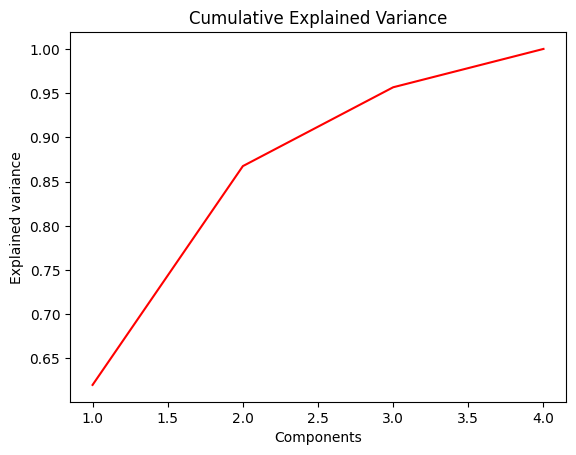

In [1132]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

The variance reaches over 0.9 between 2 and 3 components.

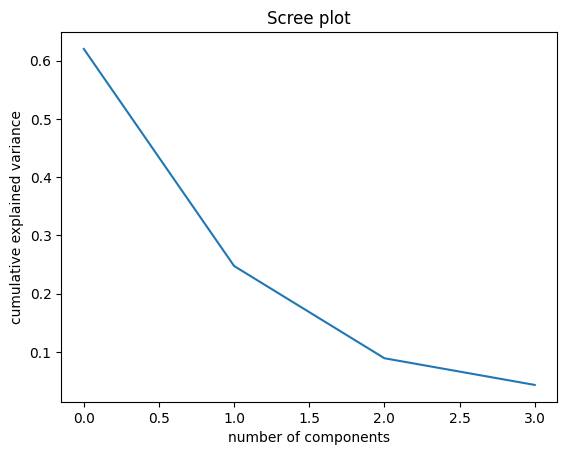

In [1133]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

In [1134]:
'''The first 2 principal components together explain around 90% of the variance.
We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction.
We began with 4 variables and now we have 2 variables explaining most of the variability.'''
pca_df = pd.DataFrame(X_std_trans[:,0:2], index = df.index)
pca_df.head()

,0,1
City,,
Alabama,0.986,1.133
Alaska,1.950,1.073
Arizona,1.763,-0.746
Arkansas,-0.141,1.120
California,2.524,-1.543


## Hierarchical clustering

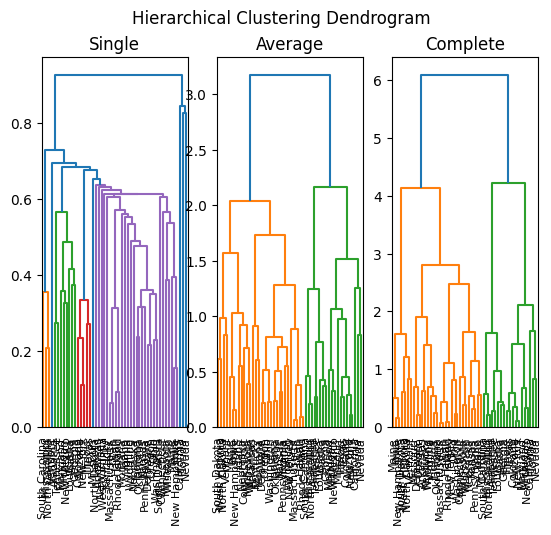

In [1135]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

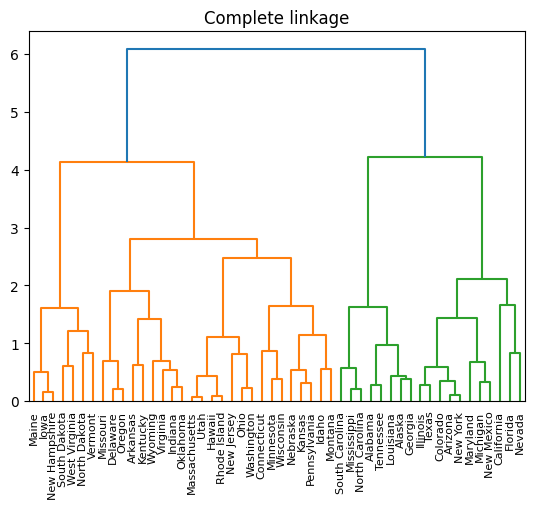

In [1136]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

This complete hierarchical clustering splits the cities 31 to 19. 31 have less crime while 19 have more.

## Kmeans clustering

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


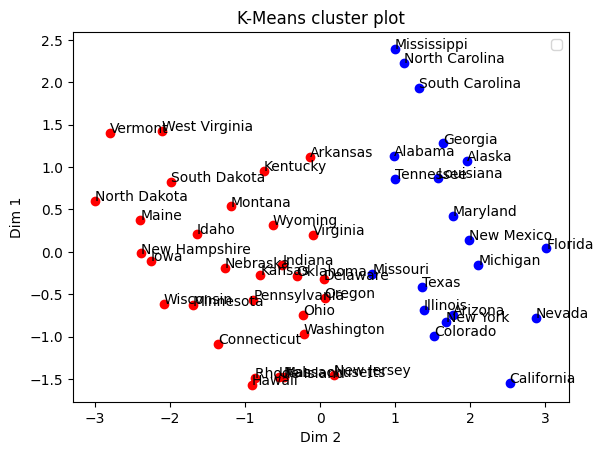

In [1137]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

This Kmeans clustering splits the cities 31 to 19. 31 have less crime while 19 have more.

In [1138]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]
group2 = np.array(cities)[group2_indices]

# Groups shown by UrbanPop %
print("Group 0: {}\n\n".format([df.loc[x]["UrbanPop"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["UrbanPop"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["UrbanPop"] for x in group2]))

# Groups shown with all data (open in text editor to see in full)
print("Group 0: {}\n\n".format([df.loc[x] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x] for x in group2]))

Group 0: [50.0, 77.0, 72.0, 83.0, 54.0, 65.0, 57.0, 66.0, 52.0, 51.0, 85.0, 66.0, 53.0, 62.0, 56.0, 89.0, 44.0, 75.0, 68.0, 67.0, 72.0, 87.0, 45.0, 80.0, 32.0, 63.0, 73.0, 39.0, 66.0, 60.0]


Group 1: [58.0, 48.0, 80.0, 91.0, 78.0, 80.0, 60.0, 83.0, 66.0, 67.0, 74.0, 44.0, 70.0, 81.0, 70.0, 86.0, 45.0, 48.0, 59.0, 80.0]


Group 2: []


Group 0: [Murder       8.800
Assault    190.000
UrbanPop    50.000
Rape        19.500
Name: Arkansas, dtype: float64, Murder       3.300
Assault    110.000
UrbanPop    77.000
Rape        11.100
Name: Connecticut, dtype: float64, Murder       5.900
Assault    238.000
UrbanPop    72.000
Rape        15.800
Name: Delaware, dtype: float64, Murder      5.300
Assault    46.000
UrbanPop   83.000
Rape       20.200
Name: Hawaii, dtype: float64, Murder       2.600
Assault    120.000
UrbanPop    54.000
Rape        14.200
Name: Idaho, dtype: float64, Murder       7.200
Assault    113.000
UrbanPop    65.000
Rape        21.000
Name: Indiana, dtype: float64, Murder     